Loading DataSet

In [153]:
Libraries used in project
#!pip install spacy
#!python -m spacy download en_core_web_sm
#!pip install beautifulsoup4
#!pip install preprocessor
#import preprocessor as ps
#!pip install contractions
#!pip install pycontractions
#!pip install bert-for-tf2
#!pip install sentencepiece
#!pip install pdpipe 
#!pip install symspellpy
#import sys  
#!{sys.executable} -m pip install contractions
#import unicodedata
#!pip install plotly
#!pip install cufflinks
#!pip install textblob
#!pip install pyLDAvis==2.1.2
#!pip install scattertext


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
ERROR: Operation cancelled by user
  Using cached https://files.pythonhosted.org/packages/a6/f5/d3ec9491c530cbc03af32ca2c6b69b0e89660daeb2856b485d90f9d82e5e/pycontractions-2.0.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/97/45/0fd1d3683d6129f30fa09143fa383cdf6dff8bc0d1648f2cf156109cb772/language-check-1.1.tar.gz
  ERROR: Failed building wheel for language-check
  Running setup.py clean for language-check
Failed to build language-check
    Running setup.py install for language-check ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-086sgv6g/language-check/setup.py'"'"'; __file__='"'"'/tmp/pip-install-086sgv6g/language-check/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile

In [2]:

!pip install -U scikit-learn


     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import json
%matplotlib inline
from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests # making HTTP requests in Python
import re
import gzip
import itertools
import string
import wordcloud
import datetime as dt
import pylab as pl
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import gensim
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis.gensim #LDA visualization library
from itertools import chain

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [5]:
product_data=pd.read_csv('Comp Product Reviews.csv')

In [6]:
product_data.head()

ID      profileName  ... Rating            Brand
0   RRXDF48XJ3PIZ      SonamGupta   ...    5.0  Amazon Airfryer
1  R1T00CUBTLNHWV     Sumit Saxena  ...    1.0  Amazon Airfryer
2   RYRABT0JRHNX2     Ankit Mishra  ...    5.0  Amazon Airfryer
3  R30JVDIPF5BO91     Tushar Arora  ...    2.0  Amazon Airfryer
4   RBCHCB8D9ZTY3  Amazon Customer  ...    1.0  Amazon Airfryer

[5 rows x 5 columns]

In [7]:
product_data=product_data.drop(['ID', 'profileName'], axis=1)
product_data

ReviewTitle  Rating            Brand
0            MUST BUY ..... INALASA AIRFRYER     5.0  Amazon Airfryer
1     Low Quality/ Pathetic Customer Support     1.0  Amazon Airfryer
2                                Easy to use     5.0  Amazon Airfryer
3                 Was almost a great product     2.0  Amazon Airfryer
4          Product has manufacturing defect.     1.0  Amazon Airfryer
...                                      ...     ...              ...
3473  Air Fryer with a difference but seller     4.0       Varada Pro
3474                      A happy experience     5.0       Varada Pro
3475                             Recommended     5.0       Varada Pro
3476           Looks trendy black and copper     5.0       Varada Pro
3477                                     NaN     NaN              NaN

[3478 rows x 3 columns]

DATA INFO

In [8]:
product_data.shape

(3478, 3)

In [9]:
product_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ReviewTitle  3476 non-null   object 
 1   Rating       3477 non-null   float64
 2   Brand        3477 non-null   object 
dtypes: float64(1), object(2)
memory usage: 81.6+ KB


We can see that we don't have any null values.

# Check for Duplicate entries 

In [10]:

# Check for Rows containing duplicate data
duplicate_rows_df = product_data[product_data.duplicated()]


In [11]:
duplicate_rows_df.shape

(420, 3)

## Droping duplicates

In [12]:
PD_D=product_data.drop_duplicates()

In [13]:
product_data.count()

ReviewTitle    3476
Rating         3477
Brand          3477
dtype: int64

Checking for Null Values

In [14]:
# Finding the null values.
print(product_data.isnull().sum())

ReviewTitle    2
Rating         1
Brand          1
dtype: int64


**Droping Null values**

In [15]:

product_data = product_data.dropna() 
product_data.count()

ReviewTitle    3476
Rating         3476
Brand          3476
dtype: int64

In [16]:
# After dropping the values check for Null Values
print(product_data.isnull().sum()) 

ReviewTitle    0
Rating         0
Brand          0
dtype: int64


NO of Brands

In [17]:
print(product_data["Brand"].nunique())
product_data["Brand"].unique()

9


array(['Amazon Airfryer', 'American Micronic', 'Hilton',
       'Insala airfryer', 'Kenster', 'Kent', 'Philips', 'Solara Digital',
       'Varada Pro'], dtype=object)

# **how many Brands of Airfryer have Maximum ratings**

In [18]:
print(product_data["Brand"][product_data["Rating"] == product_data["Rating"].max()].nunique())
print(print(product_data["Brand"][product_data["Rating"] == product_data["Rating"].max()].unique()))
print(product_data["Brand"][product_data["Rating"] == product_data["Rating"].max()].count())

9
['Amazon Airfryer' 'American Micronic' 'Hilton' 'Insala airfryer'
 'Kenster' 'Kent' 'Philips' 'Solara Digital' 'Varada Pro']
None
1975


How many brands has Mininum Ratings what are their names

In [19]:
print(product_data["Brand"][product_data["Rating"] == product_data["Rating"].min()].nunique())
print(print(product_data["Brand"][product_data["Rating"] == product_data["Rating"].min()].unique()))
print(product_data["Brand"][product_data["Rating"] == product_data["Rating"].min()].count())

7
['Amazon Airfryer' 'American Micronic' 'Hilton' 'Insala airfryer'
 'Kenster' 'Kent' 'Philips']
None
439


# **Which Brand has Maximum and minimum Number of reviews**

In [20]:

product_data[["Brand", "Rating"]][product_data["ReviewTitle"] == product_data["ReviewTitle"].min()]




Brand  Rating
1698  Philips     4.0

In [21]:

product_data[["Brand", "Rating"]][product_data["ReviewTitle"] == product_data["ReviewTitle"].max()]

Brand  Rating
717  American Micronic     5.0

In [22]:
#Sorting data according to ProductId in ascending order
product_data=product_data.sort_values("Rating",axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')
product_data.head()

ReviewTitle  ...            Brand
1372                            Push button  not worked  ...  Insala airfryer
1636                          air fryer get hot outside  ...             Kent
1911  \n  Repalced it once but to this day doesn't w...  ...          Philips
1015                           Defective piece was sent  ...  Insala airfryer
2921  \n  An excellent Product. A lot of calories ca...  ...          Philips

[5 rows x 3 columns]

In [23]:
print(product_data['Rating'].value_counts())
print(product_data['Brand'].value_counts())

5.0    1975
4.0     739
1.0     439
3.0     202
2.0     121
Name: Rating, dtype: int64
Philips              1796
Amazon Airfryer       553
Insala airfryer       553
American Micronic     396
Kenster                87
Hilton                 44
Kent                   23
Varada Pro             21
Solara Digital          3
Name: Brand, dtype: int64


Rectangle(xy=(-0.4, 0), width=0.8, height=1975, angle=0)
1975
Rectangle(xy=(0.6, 0), width=0.8, height=739, angle=0)
739
Rectangle(xy=(1.6, 0), width=0.8, height=439, angle=0)
439
Rectangle(xy=(2.6, 0), width=0.8, height=202, angle=0)
202
Rectangle(xy=(3.6, 0), width=0.8, height=121, angle=0)
121


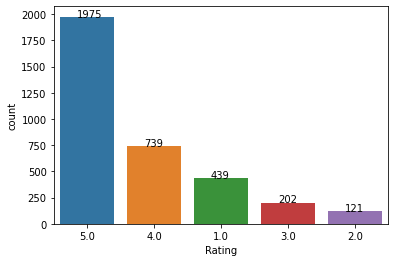

In [24]:
ax = sns.countplot(x=product_data["Rating"],  data=product_data, order = product_data["Rating"].value_counts().index )
for p, label in zip(ax.patches, product_data["Rating"].value_counts()):
    print(p)
    print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))


Tell me brand that has maximum numbers of reviews and how many ?

In [25]:
df1=product_data.groupby('Brand').count()

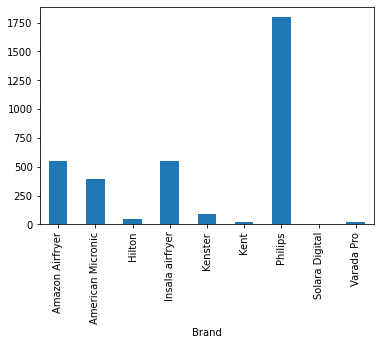

In [26]:

df1["ReviewTitle"].plot(kind='bar')


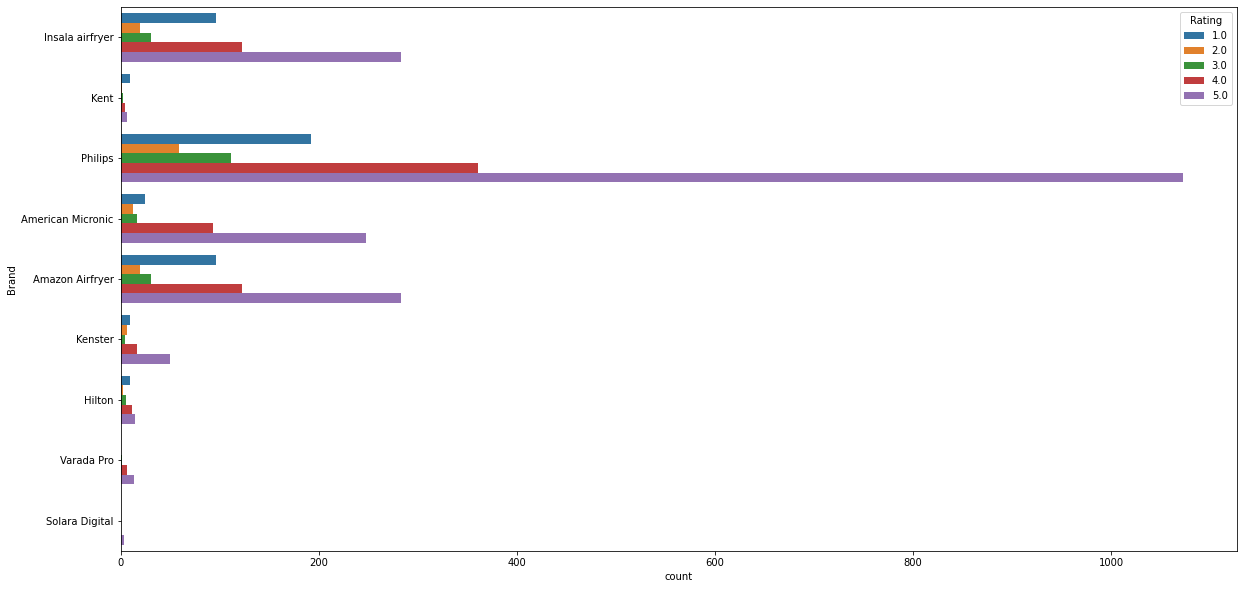

In [27]:
 plt.figure(figsize=(20,10))
sns.countplot(y="Brand",  hue="Rating", data=product_data)


**Text Cleaning and Text Preprocessing**

*For Text Preprocessing we will use TextBlob Library. In Text Preprocessing we remove stop words, punctuations, convert into lower cases, lemmatize,spell check TextBlob is built upon NLTK and provides an easy to use interface to the NLTK library. various tasks can be performed like part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
*

In [29]:
#Z=''.join(product_data['ReviewTitle'].tolist())
#Z

'Push button  not workedair fryer get hot outside\n  Repalced it once but to this day doesn\'t work properly.\nDefective piece was sent\n  An excellent Product. A lot of calories can be saved with its use\nDamaged product receivedWorst experienceWant this replacementService problem\n  Reveived damaged product with full of scratch and the coil also detached from the position\nWorst service. Poor quality product.\n  Product is bud but delivered to me has a little problem.\nTo buy Inalsa airfryer is a waste of money\n  Totally different product delivered without indicator light and display as shown in pic. Very disappointed from this.\n\n  Buy any air frier at lesser cost, it hardly matters, dont pay so much for just a name\nNo guarantee card no invoice no recipe book\n  First Time. I ordered one  but it did not work - the \'tray\' would not go in because it was obstructed by a wire hanging down. I tried to return it to the \'authorised\' agent that was some 25 kms away. At 1230h when I r

**Contractions are those little literary shortcuts we take where instead of “Should have” we prefer “Should’ve” or where “Do not” quickly becomes “Don’t”. We are going to add a new column to our dataframe called “no_contract” and apply a lambda function to the “Reviews” field which will expand any contractions.**

In [30]:

contractions = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                      "might've": "might have" ,"must've": "must have","o'clock": "of the clock",
                    "she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                    "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have",
                      "would've": "would have" ,"y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [31]:

def cont_to_exp(x):
  if type(x) is str:               ###We cannot apply the contractions when it is with Numerical number
      x=x.replace('\\','')
  for key in contractions:
    values=contractions[key]
    x=x.replace(key,values)
    return
  else:
    return x

In [32]:

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions.keys()))
contractions_re


re.compile(r"(ain't|'s|aren't|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|how'd|how'd'y|how'll|I'd|I'd've|I'll|I'll've|I'm|I've|isn't|it'd|it'd've|it'll|it'll've|let's|ma'am|might've|must've|o'clock|she'd|she'd've|she'll|she'll've|should've|that'd|that'd've|there'd|there'd've|they'd|they'd've|they'll|they'll've|they're|they've|to've|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what've|when've|where'd|where've|who'll|who'll've|who've|why've|will've|would've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)",
re.UNICODE)

TEXT **PREPROCESSING**

In [33]:
# find sentences containing HTML tags
import re
i=0;
for sent in product_data['ReviewTitle'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

In [34]:

                                  ####TOKENIZE#####################



for sent in product_data['ReviewTitle'].values:
  def cleandurl(sent): #function to clean the word of any URL
    cleandu = re.compile('r"http\S+"')
    cleanurl= re.sub(cleandu, ' ', sent)
    return cleanurl

for sent in product_data['ReviewTitle'].values:
  def cleanlower(sent): #function to clean and lower the sencentce
     cleandl = re.compile('lower()')
     cleandlr= re.sub(cleandl, ' ', sent)
     return cleandlr
for sent in product_data['ReviewTitle'].values:
  def cleanldigit(sent): #function to clean the word of any digit
     cleand = re.compile('\w*\d\w*')
     cleandigit= re.sub(cleand, ' ', sent)
     return cleandigit


for sent in product_data['ReviewTitle'].values:
  def cleanhtml(sent): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sent)
    return cleantext
for sent in product_data['ReviewTitle'].values:
  def cleanpunc(sent): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sent)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer which is developed in recent years
stop=set(stopwords.words('english'))



    


print(stop)
print('************************************')
print(sno.stem('tasty'))

 






    



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'by', 'with', 'themselves', 'the', 'who', 'more', "you'd", "needn't", 'at', 'is', 'were', "mightn't", 'he', 'but', 'doesn', "should've", 'll', 'an', 'am', 'when', 'be', 'same', 'that', 'couldn', "doesn't", 'i', "you're", 'in', 'during', "you've", 'our', 'won', 'herself', 'needn', 's', 'her', 'yours', "don't", 'himself', 'until', 'being', 'each', 'now', 'my', "it's", 'ain', 'most', "isn't", 've', 'under', 'than', "shan't", 'wouldn', 'mustn', 'through', 'for', 'there', 'too', 'about', 'nor', 'will', 't', "mustn't", "wasn't", 'against', 'of', 'once', 'its', 'into', 'over', 'she', 'his', 'own', 'd', 'wasn', 'which', 'how', 'off', 'from', 'had', "she's", 'these', 'out', 'm', 'down', 'above', 'what', 'while', 'so', 'because', 'mightn', 'itself', 'did', 'to', 'has', 'not', "weren't", 'hasn', 'ours', 'such', "didn't", 'and', "shouldn't", 'been', 'does', 'just', 'a', 'isn', 'having', 

<input>:8: DeprecationWarning:

invalid escape sequence \S

<input>:8: DeprecationWarning:

invalid escape sequence \S

<input>:8: DeprecationWarning:

invalid escape sequence \S

<input>:8: DeprecationWarning:

invalid escape sequence \S

<input>:8: DeprecationWarning:

invalid escape sequence \S

<input>:8: DeprecationWarning:

invalid escape sequence \S

<input>:8: DeprecationWarning:

invalid escape sequence \S

<input>:8: DeprecationWarning:

invalid escape sequence \S

<input>:19: DeprecationWarning:

invalid escape sequence \w

<input>:8: DeprecationWarning:

invalid escape sequence \S

<input>:19: DeprecationWarning:

invalid escape sequence \w

<input>:8: DeprecationWarning:

invalid escape sequence \S

<input>:19: DeprecationWarning:

invalid escape sequence \w

<input>:8: DeprecationWarning:

invalid escape sequence \S

<input>:19: DeprecationWarning:

invalid escape sequence \w

<input>:8: DeprecationWarning:

invalid escape sequence \S

<input>:19: DeprecationWarning:

inv

In [35]:

i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in product_data['ReviewTitle'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    sent=cleandurl(sent) # remove URL
    sent=cleanldigit(sent) # remove digits


    
    for w in sent.split():

        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower()  not in  stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (product_data['Rating'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(product_data['Rating'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

Streaming output truncated to the last 5000 lines.
[b'good']
***********************************************************************
[b'good', b'applianc', b'kitchen', b'especi', b'fond', b'fri', b'food', b'put', b'weight', b'howev', b'tast', b'food', b'cook', b'air', b'fryer', b'good', b'oil', b'fri', b'food', b'becom', b'quit', b'accustom']
***********************************************************************
[b'smart', b'look', b'easi', b'use', b'effect', b'cook']
***********************************************************************
[b'air', b'fryer', b'good', b'work', b'fine', b'consum', b'lot', b'electr', b'power', b'almost', b'equal', b'oven']
***********************************************************************
[b'bought', b'last', b'month', b'use', b'much', b'tri', b'fri', b'chucken', b'fish', b'fri', b'turn', b'crisp', b'good', b'impt', b'stress', b'free']
***********************************************************************
[b'good', b'use', b'product', b'includ', b'c

In [36]:
product_data['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
product_data['CleanedText']=product_data['CleanedText'].str.decode("utf-8")

In [37]:
product_data

ReviewTitle  ...                                 CleanedText
1372                            Push button  not worked  ...                            push button work
1636                          air fryer get hot outside  ...                    air fryer get hot outsid
1911  \n  Repalced it once but to this day doesn't w...  ...               repalc day doesnt work proper
1015                           Defective piece was sent  ...                            defect piec sent
2921  \n  An excellent Product. A lot of calories ca...  ...           excel product lot calori save use
...                                                 ...  ...                                         ...
1520                    Value for money n easy to clean  ...                       valu money easi clean
1522                            Good and useful product  ...                            good use product
1524                  Very easy to use and good product  ...                       easi use good product
1509  Excellent Product. Proud owner of Inalsa Air F...  ...  excel product proud owner inalsa air fryer
3476                      Looks trendy black and copper  ...                    look trendi black copper

[3476 rows x 4 columns]

Feature Engineering
**we will be using Textblob for Sentement_polarity of the Reviews and word len and review len**

In [38]:
from textblob import TextBlob   ####TextBlob is a python library and offers a simple API to access its methods and perform basic NLP tasks. 
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [39]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()


     |████████████████████████████████| 133kB 3.9MB/s 


In [40]:
def get_polarity(x):
    return TextBlob(x).sentiment.polarity
product_data['Polarity'] = product_data['ReviewTitle'].apply(get_polarity)
product_data['Sentiment_Type']=''
product_data.loc[product_data.Polarity>0,'Sentiment_Type']='POSITIVE'
product_data.loc[product_data.Polarity==0,'Sentiment_Type']='NEUTRAL'
product_data.loc[product_data.Polarity<0,'Sentiment_Type']='NEGATIVE'

In [41]:
product_data.reset_index(drop=True)

ReviewTitle  ...  Sentiment_Type
0                               Push button  not worked  ...         NEUTRAL
1                             air fryer get hot outside  ...        POSITIVE
2     \n  Repalced it once but to this day doesn't w...  ...         NEUTRAL
3                              Defective piece was sent  ...         NEUTRAL
4     \n  An excellent Product. A lot of calories ca...  ...        POSITIVE
...                                                 ...  ...             ...
3471                    Value for money n easy to clean  ...        POSITIVE
3472                            Good and useful product  ...        POSITIVE
3473                  Very easy to use and good product  ...        POSITIVE
3474  Excellent Product. Proud owner of Inalsa Air F...  ...        POSITIVE
3475                      Looks trendy black and copper  ...        POSITIVE

[3476 rows x 6 columns]

In [42]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

**Distribution of Sentiment polarity**

In [43]:

configure_plotly_browser_state()
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, iplot
pyo.init_notebook_mode()
init_notebook_mode(connected=True) 
product_data['Polarity'].iplot(kind='hist',colors='red',bins=50,xTitle='Polarity',yTitle='count',title='Sentiment Polarity distribution')

######### we will be ploting polarity count on reviews


In [44]:
####### we will be ploting count of sentiment_type 
configure_plotly_browser_state()
product_data.Sentiment_Type.value_counts().iplot(kind='bar',title="Sentiment Analysis")

In [45]:
###### we will be plotting rating count

configure_plotly_browser_state()
product_data['Rating'].iplot(kind='hist',colors='red',bins=50,xTitle='Rating',yTitle='count',title='Review Rating distribution')


In [46]:
product_data['Brand'].value_counts()

Philips              1796
Amazon Airfryer       553
Insala airfryer       553
American Micronic     396
Kenster                87
Hilton                 44
Kent                   23
Varada Pro             21
Solara Digital          3
Name: Brand, dtype: int64

In [47]:
product_data.groupby('Brand').count()

ReviewTitle  Rating  CleanedText  Polarity  Sentiment_Type
Brand                                                                        
Amazon Airfryer            553     553          553       553             553
American Micronic          396     396          396       396             396
Hilton                      44      44           44        44              44
Insala airfryer            553     553          553       553             553
Kenster                     87      87           87        87              87
Kent                        23      23           23        23              23
Philips                   1796    1796         1796      1796            1796
Solara Digital               3       3            3         3               3
Varada Pro                  21      21           21        21              21

In [48]:
###COUNT PLOT ON BRANDS
configure_plotly_browser_state()
product_data['Brand'].value_counts().iplot(kind='bar',xTitle='Brand',yTitle='count',title='COUNT OF BRANDS')

In [49]:
!pip install text2emotion
import text2emotion as te

     |████████████████████████████████| 61kB 2.6MB/s 
     |████████████████████████████████| 133kB 7.8MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [50]:
def get_emotion(x):
         return te.get_emotion(x)




In [51]:
product_data.loc[product_data.Polarity>=0,'Review_emotions']='HAPPY'
product_data.loc[product_data.Polarity<0,'Review_emotions']='ANGRY'
product_data.loc[product_data.Polarity==0,'Review_emotions']='SATISFIED'

In [52]:
product_data.loc[product_data.Polarity>=0,'pol_num']='1'
product_data.loc[product_data.Polarity<0,'pol_num']='-1'
product_data.loc[product_data.Polarity==0,'pol_num']='0'

In [53]:
product_data.head(50)

ReviewTitle  ...  pol_num
1372                            Push button  not worked  ...        0
1636                          air fryer get hot outside  ...        1
1911  \n  Repalced it once but to this day doesn't w...  ...        0
1015                           Defective piece was sent  ...        0
2921  \n  An excellent Product. A lot of calories ca...  ...        1
586                            Damaged product received  ...        0
1017                                   Worst experience  ...       -1
1634                              Want this replacement  ...        0
313                                     Service problem  ...        0
2919  \n  Reveived damaged product with full of scra...  ...        1
1020               Worst service. Poor quality product.  ...       -1
2918  \n  Product is bud but delivered to me has a l...  ...       -1
321          To buy Inalsa airfryer is a waste of money  ...       -1
1929  \n  Totally different product delivered withou...  ...       -1
2806  \n  Buy any air frier at lesser cost, it hardl...  ...       -1
304         No guarantee card no invoice no recipe book  ...        0
2950  \n  First Time. I ordered one  but it did not ...  ...       -1
2951  \n  Product is really good. suitable for fries...  ...        1
2606       \n  It's not working i want to exchange it\n  ...        0
300                                          Do not buy  ...        0
1027                        Rust air frier, opened box,  ...        0
1204                          Product didn't powered up  ...        0
1942  \n  Extremely disappointed. I opened it after ...  ...        1
2915  \n  Compact,portable and ease of cleaning. Req...  ...        1
1616                                             Review  ...        0
589                           Not good even prima facie  ...       -1
1910  \n  Did not receive the recipe book.For such a...  ...       -1
1210                                       Poor quality  ...       -1
2923  \n  This isn't even worth 5k anymore. This is ...  ...        1
351                                           Don't buy  ...        0
1650                              Dont buy this product  ...        0
1645                           NOT GOOD FOR MAKING FOOD  ...       -1
1006  Doesn't work anymore Amazon is sell so cheap q...  ...        1
346                                     Defected piece.  ...        0
1882  \n  It's not getting locked. We got faulty pro...  ...        0
1885  \n  RECEIVED A BROKEN PRODUCT 2nd timeAwful ex...  ...       -1
1643                                   No safety switch  ...        0
341                                      Defective pro6  ...        0
1008                                      Worst product  ...       -1
1890  \n  Received used product please check your pr...  ...        0
2832     \n  The product arrived broken unfortunately\n  ...       -1
1893                   \n  Damaged product delivered!\n  ...        0
1642                                          Pathetic!  ...       -1
1895  \n  I got the product wth broken handle.Outsid...  ...       -1
334                                     Chinese product  ...        0
1897  \n  Got a defective  product....how is it that...  ...       -1
1641                       Didn't work after 1 time use  ...        0
2807  \n  Tried first time to make French Fries. Whe...  ...       -1
330                                 Don't buy seriously  ...       -1
1638          Malfunctioning within 2 weeks of purchase  ...        0

[50 rows x 8 columns]

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

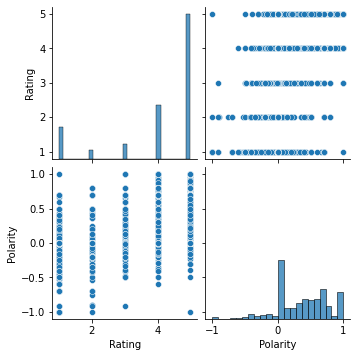

In [55]:
sns.pairplot(product_data)

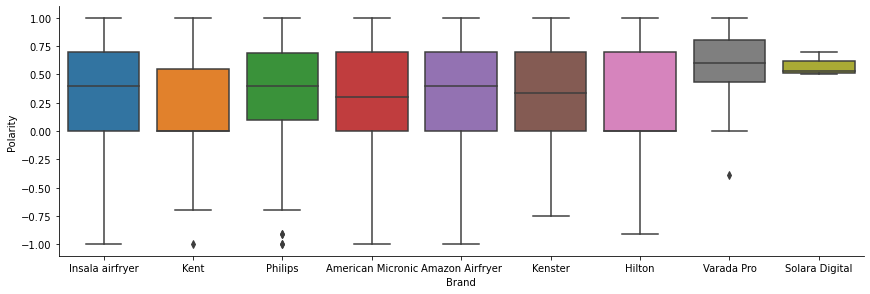

In [56]:
sns.catplot(x='Brand',y='Polarity',data=product_data,kind='box',height=4, aspect=3)

In [57]:
import plotly. express as px
import plotly.graph_objects as go

/usr/local/lib/python3.7/dist-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.7/dist-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.7/dist-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.7/dist-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.7/dist-packages/plotly/express/_doc.py:503: DeprecationWarning:

inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()

/usr/local/lib/python3.7/dist-

# **Based on Rating and Polarity  Recomending Brands **

---



In [58]:
x1=product_data[product_data['Rating']>=3.0]['Brand']
x2=product_data[product_data['Rating']<=2.0]['Brand']


In [59]:

trace1=go.Histogram(x=x1,name='Recomended',opacity=0.8)
trace2=go.Histogram(x=x2,name='Not Recomended',opacity=0.8)



In [60]:
configure_plotly_browser_state()
data=[trace1,trace2]
layout=go.Layout(barmode='overlay',title='Distribution of Recomending Brands based on Ratings')
fig=go.Figure(data=data,layout=layout)
fig.show()


In [61]:
y1=product_data[product_data['Polarity']>=0]['Brand']
y2=product_data[product_data['Polarity']<0]['Brand']
trace_1=go.Histogram(x=y1,name='Recomended',opacity=0.8)
trace_2=go.Histogram(x=y2,name='Not Recomended',opacity=0.8)


In [62]:
s=pd.concat([y1, y2])
s

1372    Insala airfryer
1636               Kent
1911            Philips
1015    Insala airfryer
2921            Philips
             ...       
2087            Philips
1294    Insala airfryer
1602            Kenster
1581            Kenster
1687            Philips
Name: Brand, Length: 3476, dtype: object

In [63]:
configure_plotly_browser_state()
data=[trace_1,trace_2]
layout=go.Layout(barmode='overlay',title='Distribution of polarity of reviews based on ratings')
fig=go.Figure(data=data,layout=layout)
fig.show()


In [64]:
#!pip install autoviz

In [65]:

from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (3478, 5)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  1
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    5 Predictors classified...
        This does not include the Target column(s)
        3 variables removed since they were ID or low-information variables


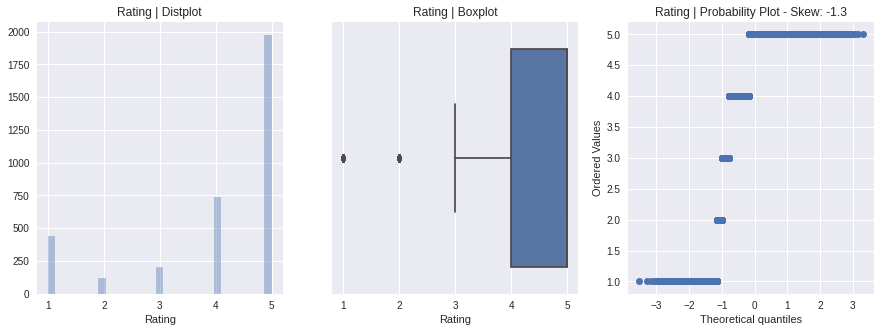

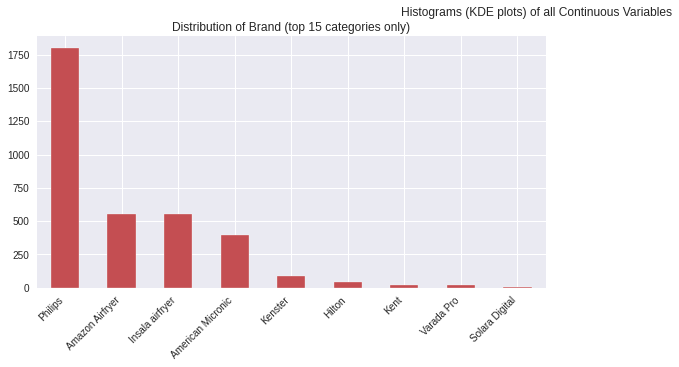

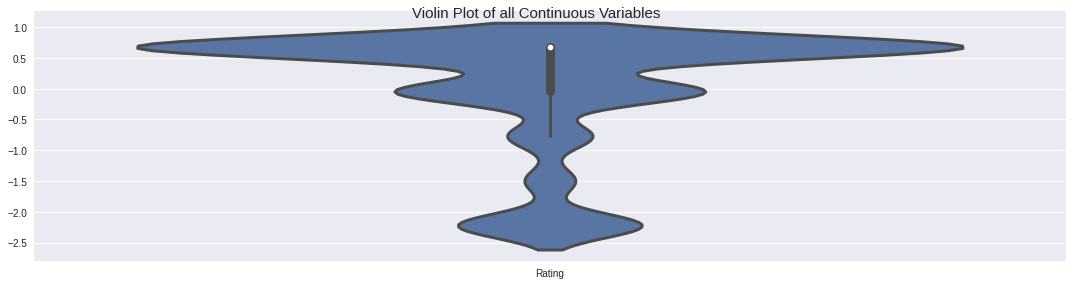

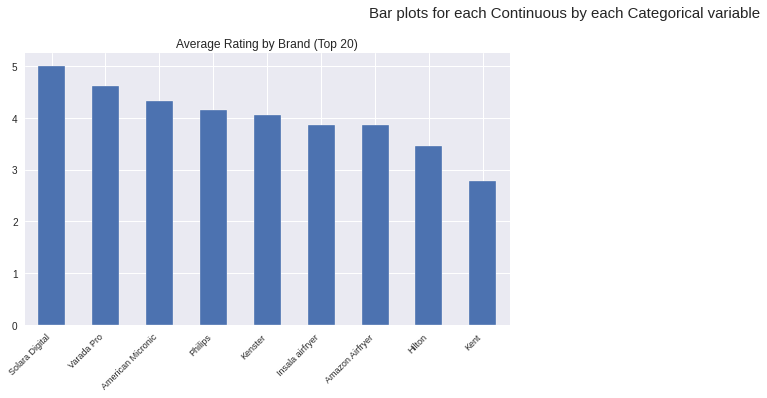

Time to run AutoViz (in seconds) = 2.156

 ###################### VISUALIZATION Completed ########################


In [66]:
filename = "Comp Product Reviews.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

In [67]:
# highest positive sentiment reviews 
only_pos=product_data[product_data["Polarity"] >0].sort_values("Sentiment_Type", ascending = False)[[ "CleanedText","Sentiment_Type","Brand","Polarity"]].head(5)
only_pos

CleanedText Sentiment_Type            Brand  Polarity
1636   air fryer get hot outsid       POSITIVE             Kent  0.125000
1108   great product amaz price       POSITIVE  Insala airfryer  0.700000
1117  good product reason price       POSITIVE  Insala airfryer  0.450000
1118              excel product       POSITIVE  Insala airfryer  1.000000
1122                  easi oper       POSITIVE  Insala airfryer  0.433333

In [68]:
# highest Neutral sentiment reviews
only_Neutral=product_data[product_data["Polarity"] ==0].sort_values("Sentiment_Type", ascending = False)[["CleanedText", "Sentiment_Type","Brand","Polarity"]].head(5)
only_Neutral

CleanedText Sentiment_Type              Brand  Polarity
1372  push button work        NEUTRAL    Insala airfryer       0.0
773          five star        NEUTRAL  American Micronic       0.0
775          five star        NEUTRAL  American Micronic       0.0
778          five star        NEUTRAL  American Micronic       0.0
779          five star        NEUTRAL  American Micronic       0.0

In [69]:
# highest Negative sentiment reviews 
only_Neg=product_data[product_data["Polarity"] <0].sort_values("Sentiment_Type", ascending = False)[["CleanedText", "Sentiment_Type","Brand","Polarity"]].head(5)
only_Neg

CleanedText  ... Polarity
1017                                       worst experi  ...    -1.00
2055  total wast moneytak lot time cooktoo much unne...  ...    -0.30
1135                                            satisfi  ...    -0.25
2360                                        expect upto  ...    -0.10
1435                                take long time cook  ...    -0.05

[5 rows x 4 columns]

In [70]:
only_pos

CleanedText Sentiment_Type            Brand  Polarity
1636   air fryer get hot outsid       POSITIVE             Kent  0.125000
1108   great product amaz price       POSITIVE  Insala airfryer  0.700000
1117  good product reason price       POSITIVE  Insala airfryer  0.450000
1118              excel product       POSITIVE  Insala airfryer  1.000000
1122                  easi oper       POSITIVE  Insala airfryer  0.433333

In [71]:
import gensim
from gensim import corpora

In [72]:
from nltk.stem.wordnet import WordNetLemmatizer
#clean the data
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma_Pos = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma_Pos.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

only_pos['lemma_Pos']=only_pos['CleanedText'].apply(clean)
only_pos['lemma_Pos']

1636    [air, fryer, get, hot, outsid]
1108     [great, product, amaz, price]
1117    [good, product, reason, price]
1118                  [excel, product]
1122                      [easi, oper]
Name: lemma_Pos, dtype: object

In [73]:
#create dictionary
dictionary_pos = corpora.Dictionary(only_pos['lemma_Pos'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(dictionary_pos.num_nnz)
print("*********************************************************************************************************")
#create document term matrix
doc_term_matrix_p = [dictionary_pos.doc2bow(doc) for doc in only_pos['lemma_Pos'] ]
print(len(doc_term_matrix_p))
print("*********************************************************************************************************")
lda = gensim.models.ldamodel.LdaModel
num_topics=3
%time ldamodel_pos = lda(doc_term_matrix_p,num_topics=num_topics,id2word=dictionary_pos,passes=50,minimum_probability=0)
ldamodel_pos.print_topics(num_topics=num_topics)

17
*********************************************************************************************************
5
*********************************************************************************************************
CPU times: user 125 ms, sys: 2.78 ms, total: 128 ms
Wall time: 129 ms


[(0,
  '0.155*"price" + 0.154*"product" + 0.153*"reason" + 0.153*"good" + 0.039*"excel" + 0.039*"oper" + 0.039*"easi" + 0.038*"great" + 0.038*"amaz" + 0.038*"get"'),
 (1,
  '0.184*"product" + 0.105*"amaz" + 0.105*"great" + 0.105*"easi" + 0.105*"oper" + 0.105*"excel" + 0.104*"price" + 0.026*"reason" + 0.026*"good" + 0.026*"get"'),
 (2,
  '0.138*"air" + 0.138*"get" + 0.138*"hot" + 0.138*"outsid" + 0.138*"fryer" + 0.035*"product" + 0.035*"excel" + 0.035*"easi" + 0.035*"oper" + 0.035*"price"')]

In [74]:
lda_display_pos = pyLDAvis.gensim.prepare(ldamodel_pos, doc_term_matrix_p, dictionary_pos, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_pos)

In [75]:
# Assigns the topics to the documents in corpus
lda_corpus_p = ldamodel_pos[doc_term_matrix_p]
[doc for doc in lda_corpus_p]

[[(0, 0.05598845), (1, 0.055844944), (2, 0.8881666)],
 [(0, 0.074320436), (1, 0.8584701), (2, 0.06720947)],
 [(0, 0.85973436), (1, 0.073184416), (2, 0.06708119)],
 [(0, 0.1187658), (1, 0.7693247), (2, 0.11190946)],
 [(0, 0.11234059), (1, 0.7754565), (2, 0.112202905)]]

In [76]:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus_p]]))

threshold = sum(scores)/len(scores)
print(threshold)
cluster1_p = [j for i,j in zip(lda_corpus_p,only_pos.index) if i[0][1] > threshold]
cluster2_p = [j for i,j in zip(lda_corpus_p,only_pos.index) if i[1][1] > threshold]
cluster3_p = [j for i,j in zip(lda_corpus_p,only_pos.index) if i[2][1] > threshold]

print(len(cluster1_p))
print(len(cluster2_p))
print(len(cluster3_p))

0.33333333507180213
1
3
1


**Negative**

In [77]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma_neg = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma_neg.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

only_Neg['lemma_neg']=only_Neg['CleanedText'].apply(clean)
only_Neg['lemma_neg']

1017                                      [worst, experi]
2055    [total, wast, moneytak, lot, time, cooktoo, mu...
1135                                            [satisfi]
2360                                       [expect, upto]
1435                             [take, long, time, cook]
Name: lemma_neg, dtype: object

In [78]:
#create dictionary
Neg_dictionary = corpora.Dictionary(only_Neg['lemma_neg'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(Neg_dictionary.num_nnz)
print("*********************************************************************************************************")
#create document term matrix
doc_term_matrix_N = [Neg_dictionary.doc2bow(doc) for doc in only_Neg['lemma_neg'] ]
print(len(doc_term_matrix_N))
print("*********************************************************************************************************")
lda_neg = gensim.models.ldamodel.LdaModel
num_topics=3
%time ldamodel_Neg = lda_neg(doc_term_matrix_N,num_topics=num_topics,id2word=Neg_dictionary,passes=50,minimum_probability=0)
ldamodel_Neg.print_topics(num_topics=num_topics)

19
*********************************************************************************************************
5
*********************************************************************************************************
CPU times: user 112 ms, sys: 22 µs, total: 112 ms
Wall time: 113 ms


[(0,
  '0.056*"satisfi" + 0.056*"experi" + 0.056*"worst" + 0.056*"upto" + 0.056*"expect" + 0.056*"time" + 0.055*"long" + 0.055*"cook" + 0.055*"take" + 0.055*"consumpt"'),
 (1,
  '0.074*"time" + 0.074*"lot" + 0.074*"total" + 0.074*"much" + 0.074*"moneytak" + 0.074*"wast" + 0.074*"consumpt" + 0.074*"unnecessari" + 0.074*"electr" + 0.074*"cooktoo"'),
 (2,
  '0.103*"cook" + 0.103*"take" + 0.103*"long" + 0.102*"time" + 0.102*"upto" + 0.102*"expect" + 0.102*"satisfi" + 0.026*"experi" + 0.026*"worst" + 0.026*"consumpt"')]

In [79]:
lda_display_Neg = pyLDAvis.gensim.prepare(ldamodel_Neg, doc_term_matrix_N, Neg_dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_Neg)


In [80]:
# Assigns the topics to the documents in corpus
lda_corpus_Neg= ldamodel_Neg[doc_term_matrix_N]
[doc for doc in lda_corpus_Neg]

[[(0, 0.11392849), (1, 0.77380013), (2, 0.11227139)],
 [(0, 0.030993827), (1, 0.9378054), (2, 0.031200701)],
 [(0, 0.16989174), (1, 0.16759525), (2, 0.662513)],
 [(0, 0.11305838), (1, 0.11168615), (2, 0.7752555)],
 [(0, 0.06776419), (1, 0.06875759), (2, 0.8634782)]]

In [81]:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus_Neg]]))

threshold = sum(scores)/len(scores)
print(threshold)
cluster1_N = [j for i,j in zip(lda_corpus_Neg,only_Neg.index) if i[0][1] > threshold]
cluster2_N = [j for i,j in zip(lda_corpus_Neg,only_Neg.index) if i[1][1] > threshold]
cluster3_N = [j for i,j in zip(lda_corpus_Neg,only_Neg.index) if i[2][1] > threshold]

print(len(cluster1_N))
print(len(cluster2_N))
print(len(cluster3_N))

0.3333333390454451
0
2
3


In [82]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma_neutral = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma_neutral.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

only_Neutral['lemma_neutral']=only_Neutral['CleanedText'].apply(clean)
only_Neutral['lemma_neutral']

1372    [push, button, work]
773             [five, star]
775             [five, star]
778             [five, star]
779             [five, star]
Name: lemma_neutral, dtype: object

In [83]:
#create dictionary
Nuu_dictionary = corpora.Dictionary(only_Neutral['lemma_neutral'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(Nuu_dictionary.num_nnz)
print("*********************************************************************************************************")
#create document term matrix
doc_term_matrix_Nuu = [Nuu_dictionary.doc2bow(doc) for doc in only_Neutral['lemma_neutral'] ]
print(len(doc_term_matrix_Nuu))
print("*********************************************************************************************************")
lda_nutr = gensim.models.ldamodel.LdaModel
num_topics=3
%time ldamodel_Nut= lda_nutr(doc_term_matrix_Nuu,num_topics=num_topics,id2word=Nuu_dictionary,passes=50,minimum_probability=0)
ldamodel_Nut.print_topics(num_topics=num_topics)

lda_display_Nut = pyLDAvis.gensim.prepare(ldamodel_Nut, doc_term_matrix_Nuu, Nuu_dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display_Nut)

11
*********************************************************************************************************
5
*********************************************************************************************************
CPU times: user 114 ms, sys: 1.92 ms, total: 116 ms
Wall time: 116 ms


In [84]:
# Assigns the topics to the documents in corpus
lda_corpus_Nut= ldamodel_Nut[doc_term_matrix_Nuu]
[doc for doc in lda_corpus_Nut]

[[(0, 0.83085287), (1, 0.0855481), (2, 0.08359901)],
 [(0, 0.11151752), (1, 0.11264899), (2, 0.7758335)],
 [(0, 0.11151738), (1, 0.112642534), (2, 0.77584004)],
 [(0, 0.11151748), (1, 0.11264774), (2, 0.7758348)],
 [(0, 0.11151741), (1, 0.11264337), (2, 0.7758392)]]

In [85]:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus_Nut]]))

threshold = sum(scores)/len(scores)
print(threshold)
cluster1_Nut = [j for i,j in zip(lda_corpus_Nut,only_Nutral.index) if i[0][1] > threshold]
cluster2_Nut = [j for i,j in zip(lda_corpus_Nut,only_Nutral.index) if i[1][1] > threshold]
cluster3_Nut = [j for i,j in zip(lda_corpus_Nut,only_Nutral.index) if i[2][1] > threshold]

print(len(cluster1_Nut))
print(len(cluster2_Nut))
print(len(cluster3_Nut))

0.3333333358168602


NameError: ignored

In [86]:
configure_plotly_browser_state()
only_pos['Brand'].value_counts().iplot(kind='bar',xTitle='Brand',yTitle='count',title='COUNT OF Positive Reviews')


In [87]:
configure_plotly_browser_state()
only_Neutral['Brand'].value_counts().iplot(kind='bar',xTitle='Brand',yTitle='count',title='COUNT OF Neutral Reviews ')


In [88]:

configure_plotly_browser_state()
only_Neg['Brand'].value_counts().iplot(kind='bar',xTitle='Brand',yTitle='count',title='COUNT OF Negative Reviews')

In [89]:
! pip install wordcloud

In [90]:
from wordcloud import WordCloud

In [91]:
import statsmodels.formula.api as sm
t1=product_data[product_data.Polarity>0]
t2=product_data[product_data.Polarity==0]
t3=product_data[product_data.Polarity<0]
reviews_sample = pd.concat([t1,t2,t3],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

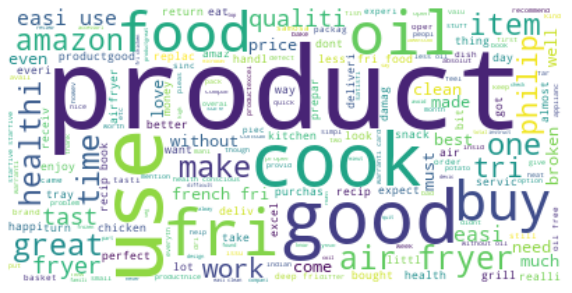

In [92]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.CleanedText.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

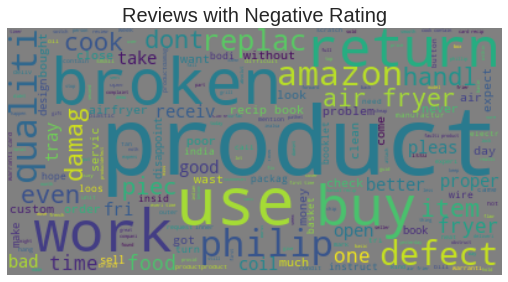

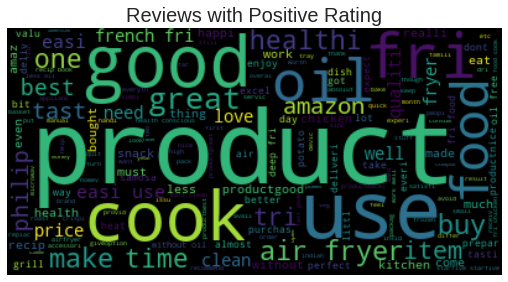

In [93]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or #5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Rating'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Rating'].isin([3,4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.CleanedText.str.cat()
positive_reviews_str = positive_reviews.CleanedText.str.cat()
wordcloud_negative = WordCloud(background_color='gray').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Rating',fontsize=20)

fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Rating',fontsize=20)
plt.show()

In [94]:
product_data.reset_index(inplace=True)

In [95]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(product_data)):
    review = re.sub('[^a-zA-Z]', ' ', product_data['CleanedText'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [96]:

## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [97]:

X.shape

(3476, 5000)

In [98]:
y=product_data['pol_num']

In [99]:


## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [100]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [101]:
from sklearn import metrics
import numpy as np
import itertools

In [102]:
classifier.fit(X_train, y_train)
pred_NB = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score of NB: ', accuracy_score(y_test, pred_NB)*100)
cm = metrics.confusion_matrix(y_test, pred_NB)
cm

Accuracy score of NB:  82.8397212543554


array([[ 48,  15,  52],
       [ 11, 144,  77],
       [ 20,  22, 759]])

In [106]:
print("Classification Report\n",classification_report(y_test, pred_NB))

Classification Report
               precision    recall  f1-score   support

          -1       0.61      0.42      0.49       115
           0       0.80      0.62      0.70       232
           1       0.85      0.95      0.90       801

    accuracy                           0.83      1148
   macro avg       0.75      0.66      0.70      1148
weighted avg       0.82      0.83      0.82      1148



**SVM**

In [107]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') #  Linear 

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [108]:
y_predsvm= clf.predict(X_test)
print(y_predsvm)

['1' '1' '1' ... '-1' '0' '1']


In [109]:
print('Accuracy score of NB: ', accuracy_score(y_test, y_predsvm)*100)
con_M = metrics.confusion_matrix(y_test, y_predsvm)
cm

Accuracy score of NB:  88.41463414634147


array([[ 48,  15,  52],
       [ 11, 144,  77],
       [ 20,  22, 759]])

In [110]:
print("Classification Report\n",classification_report(y_test, y_predsvm))

Classification Report
               precision    recall  f1-score   support

          -1       0.76      0.59      0.66       115
           0       0.77      0.92      0.84       232
           1       0.94      0.92      0.93       801

    accuracy                           0.88      1148
   macro avg       0.82      0.81      0.81      1148
weighted avg       0.89      0.88      0.88      1148



In [111]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create dataset
X_train, y_train = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.871 (0.028)


In [112]:


## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
#Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,max_df = 0.7,norm='l2', encoding='latin-1', ngram_range=(1, 2),
stop_words='english')
X_tfidf = tfidf.fit_transform(product_data['CleanedText'])
print("After vectorized text data\n\n",X_tfidf)

After vectorized text data

   (0, 959)	0.3992582680539377
  (0, 96)	0.6328973847482471
  (0, 711)	0.6633503868766487
  (1, 15)	0.33792561564510165
  (1, 607)	0.6267964287933344
  (1, 443)	0.5399661008540784
  (1, 354)	0.31517986328260245
  (1, 12)	0.31942257098145815
  (2, 966)	0.45635831391888776
  (2, 234)	0.4992335192716345
  (2, 706)	0.38391360284568415
  (2, 233)	0.4265219065651894
  (2, 201)	0.365886164298398
  (2, 959)	0.28163754383571826
  (3, 208)	0.5558912263628185
  (3, 789)	0.5492193241858085
  (3, 633)	0.44209255133019554
  (3, 207)	0.44033765958873405
  (4, 278)	0.3557583248843143
  (4, 896)	0.23673739039110592
  (4, 779)	0.47236759361047825
  (4, 105)	0.5378638354962453
  (4, 507)	0.4279010394892852
  (4, 660)	0.1634608954545647
  (4, 277)	0.3084542256144514
  :	:
  (3471, 246)	0.3339717290384532
  (3471, 926)	0.3946858324801313
  (3471, 134)	0.4051115319251633
  (3471, 558)	0.37857466318078137
  (3472, 385)	0.6530510982784345
  (3472, 912)	0.5857886413403373
  (3472, 3

In [113]:
x_train, x_test, Y_train,Y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=0)

In [114]:
clf_t = LinearSVC()

#Fit train and test into the model
clf_t.fit(x_train, Y_train)

#Predict the result
y_pred = clf_t.predict(x_test)

In [115]:
print("Confusion Matrix\n",confusion_matrix(Y_test,y_pred))

Confusion Matrix
 [[ 21   6  10]
 [  0  62  10]
 [  5  12 222]]


In [116]:
print("Accuracy of SVC: ",accuracy_score(Y_test,y_pred)*100)
print("Classification Report\n",classification_report(Y_test,y_pred))

Accuracy of SVC:  87.64367816091954
Classification Report
               precision    recall  f1-score   support

          -1       0.81      0.57      0.67        37
           0       0.78      0.86      0.82        72
           1       0.92      0.93      0.92       239

    accuracy                           0.88       348
   macro avg       0.83      0.79      0.80       348
weighted avg       0.88      0.88      0.87       348



In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [118]:
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(x_train, Y_train)
y_pred_rf = rf_classifier.predict(x_test)

In [119]:
cm_RandFor = confusion_matrix(Y_test, y_pred_rf)
cm_RandFor

array([[ 20,   8,   9],
       [  0,  64,   8],
       [  8,  19, 212]])

In [120]:
print("Accuracy of RF: ",accuracy_score(Y_test,y_pred_rf)*100)
print("Classification Report\n",classification_report(Y_test,y_pred_rf))

Accuracy of RF:  85.0574712643678
Classification Report
               precision    recall  f1-score   support

          -1       0.71      0.54      0.62        37
           0       0.70      0.89      0.79        72
           1       0.93      0.89      0.91       239

    accuracy                           0.85       348
   macro avg       0.78      0.77      0.77       348
weighted avg       0.86      0.85      0.85       348



### **NBC on TF-IDF**



In [121]:
classifier.fit(x_train, Y_train)
pred_NB_T = classifier.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score of NB: ', accuracy_score(Y_test, pred_NB_T)*100)
cm_T = metrics.confusion_matrix(Y_test, pred_NB_T)
cm_T

Accuracy score of NB:  83.62068965517241


array([[ 14,   6,  17],
       [  0,  47,  25],
       [  3,   6, 230]])

In [122]:
print("Classification Report\n",classification_report(Y_test, pred_NB_T))

Classification Report
               precision    recall  f1-score   support

          -1       0.82      0.38      0.52        37
           0       0.80      0.65      0.72        72
           1       0.85      0.96      0.90       239

    accuracy                           0.84       348
   macro avg       0.82      0.66      0.71       348
weighted avg       0.83      0.84      0.82       348



In [123]:
def get_top_n_words(x,n):
    vec=CountVectorizer(ngram_range=(4,4),stop_words='english').fit(x)
    bow=vec.transform(x)
    sum_words=bow.sum(axis=0)
    words_freq=[(word,sum_words[0,idx])for word,idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key= lambda x: x[1],reverse= True)
    return words_freq[:n]

In [129]:
Philips=only_pos[only_pos.Brand=="Philips"]
print('Positive Reviews on Philips:',Philips)



Positive Reviews on Philips: Empty DataFrame
Columns: [CleanedText, Sentiment_Type, Brand, Polarity, lemma_Pos]
Index: []


In [132]:
words_tri=get_top_n_words(Philips['CleanedText'],50)
words_tri

ValueError: ignored

In [126]:
df_pos=pd.DataFrame(words_tri,columns = ['Trigram','Frequency'])
df_pos

NameError: ignored

In [127]:
configure_plotly_browser_state()
df_pos=df_pos.set_index('Trigram')
df_pos.iplot(kind='bar')

NameError: ignored

**According to the Data we have Majority of customers prefer Philips Brand **

**Reasons**
1.  Working is good
2.  Less oil Consumption,tasty 
3.  Product easy use and easy clean
4.  Best use for deep fry stuff
5.  Worth for money and early delivery
 **From overall Data Philips Stands first because of giving importance to health  **



In [133]:
Philips_neg=only_Neg[only_Neg.Brand=="Philips"]
print('Negative Reviews on Philips:',Philips_neg)
words_tri_neg=get_top_n_words(Philips_neg['CleanedText'],30)
words_tri_neg

Negative Reviews on Philips:                                             CleanedText  ...                                          lemma_neg
2055  total wast moneytak lot time cooktoo much unne...  ...  [total, wast, moneytak, lot, time, cooktoo, mu...
2360                                        expect upto  ...                                     [expect, upto]

[2 rows x 5 columns]


[('total wast moneytak lot', 1),
 ('wast moneytak lot time', 1),
 ('moneytak lot time cooktoo', 1),
 ('lot time cooktoo unnecessari', 1),
 ('time cooktoo unnecessari electr', 1),
 ('cooktoo unnecessari electr consumpt', 1)]

In [134]:
df_Neg=pd.DataFrame(words_tri_neg,columns = ['Trigram','Frequency'])
df_Neg

Trigram  Frequency
0              total wast moneytak lot          1
1               wast moneytak lot time          1
2            moneytak lot time cooktoo          1
3         lot time cooktoo unnecessari          1
4      time cooktoo unnecessari electr          1
5  cooktoo unnecessari electr consumpt          1

In [135]:
configure_plotly_browser_state()
df_Neg=df_Neg.set_index('Trigram')
df_Neg.iplot(kind='bar')

 ** Negative Reviews**
 **According to the Data Very few customers are not satisfied with product**

**Reasons**



1.  Damaged product and deliverd defected peice
2.  Recipie book miss
3.  Time consuming
3.  length of the wire is too short
4.   work similar to Microwave




In [145]:
Amazon_Airfryer_pos=only_pos[only_pos.Brand=="Amazon Airfryer"]
print('positive on Amazon Airfryer:',Amazon_Airfryer_pos)
am_words_tri_pos=get_top_n_words(Amazon_Airfryer_pos['CleanedText'],30)
am_words_tri_pos

positive on Amazon Airfryer: Empty DataFrame
Columns: [CleanedText, Sentiment_Type, Brand, Polarity, lemma_Pos]
Index: []


ValueError: ignored

In [146]:
#*According to the Data we have customers prefer Brand *

#Reasons

#Healthy option to buy
#Less oil Consumption,tasty
#Product easy use and easy clean
#Fantastic product at most competitive in price
#From overall Data Amazon AirFrier Stands best in its cost

In [147]:
df_am_pos=pd.DataFrame(am_words_tri_pos,columns = ['Trigram','Frequency'])
df_am_pos

NameError: ignored

In [148]:
configure_plotly_browser_state()
df_am_pos=df_am_pos.set_index('Trigram')
df_am_pos.iplot(kind='bar')

NameError: ignored



**According to the Data we have customers prefer  Brand **

Reasons

1. Healthy option to buy 
2. Less oil Consumption,tasty
3. Product easy use and easy clean
4. Fantastic product at most competitive in  price
4.   **From overall Data Amazon AirFrier Stands best in its cost**



In [149]:
Amazon_Airfryer_neg=only_Neg[only_Neg.Brand=="Amazon Airfryer"]
print('Negative on Amazon Airfryer:',Amazon_Airfryer_neg)
am_words_tri_Neg=get_top_n_words(Amazon_Airfryer_neg['CleanedText'],30)
am_words_tri_Neg
df_am_Neg=pd.DataFrame(am_words_tri_Neg,columns = ['Trigram','Frequency'])
df_am_Neg

Negative on Amazon Airfryer: Empty DataFrame
Columns: [CleanedText, Sentiment_Type, Brand, Polarity, lemma_neg]
Index: []


ValueError: ignored

In [ ]:
#NEGATIVE REVIEWS ON AMAZON AIR FRYER**
#1.Poor paint quality
#2.Improper packing
#3.Missing of manual and warranty


In [ ]:
configure_plotly_browser_state()
df_am_Neg=df_am_Neg.set_index('Trigram')
df_am_Neg.iplot(kind='bar')

In [150]:
insala_Airfryer_neg=only_Neg[only_Neg.Brand=="Insala airfryer"]
print('Negative on Amazon Airfryer:',insala_Airfryer_neg)
In_words_tri_Neg=get_top_n_words(insala_Airfryer_neg['CleanedText'],30)
In_words_tri_Neg
df_In_Neg=pd.DataFrame(In_words_tri_Neg,columns = ['Trigram','Frequency'])
df_In_Neg

Negative on Amazon Airfryer:               CleanedText Sentiment_Type  ... Polarity                 lemma_neg
1017         worst experi       NEGATIVE  ...    -1.00           [worst, experi]
1135              satisfi       NEGATIVE  ...    -0.25                 [satisfi]
1435  take long time cook       NEGATIVE  ...    -0.05  [take, long, time, cook]

[3 rows x 5 columns]


ValueError: ignored

In [151]:
#Negative reviews on insala air fryer
#1.Low Quality/ Pathetic Customer Support
#2. Product has manufacturing defect.
#3.Poor design and Quality. Look for something Better.
#4. Loose body. Top cover not closing tightly
#5.Air frier became nonfunctional within gaurentee period
#6.No warranty card no recipe book received
#These are the issues faced by the customers on this product.

In [152]:
kn_Airfryer_neg=only_Neg[only_Neg.Brand=="Kenster"]
print('Negative on kenstar Airfryer:',kn_Airfryer_neg)
kn_words_tri_Neg=get_top_n_words(kn_Airfryer_neg['CleanedText'],30)
kn_words_tri_Neg
df_kn_Neg=pd.DataFrame(kn_words_tri_Neg,columns = ['Trigram','Frequency'])
df_kn_Neg

Negative on kenstar Airfryer: Empty DataFrame
Columns: [CleanedText, Sentiment_Type, Brand, Polarity, lemma_neg]
Index: []


ValueError: ignored

In [ ]:
#Negative reviews on kenster
#1.Broken product
#2.Product defective

In [ ]:
kent_Airfryer_neg=only_Neg[only_Neg.Brand=="Kent"]
print('Negative on kent Airfryer:',kent_Airfryer_neg)
kent_words_tri_Neg=get_top_n_words(kent_Airfryer_neg['CleanedText'],5)
kent_words_tri_Neg
df_kent_Neg=pd.DataFrame(kent_words_tri_Neg,columns = ['Trigram','Frequency'])
df_kent_Neg

In [ ]:
#Negative reviews on kent
#1. Bad quality.
#2.Malfunctioning within 2 weeks of purchase
#3. Didn't work after 1 time use

In [ ]:
AMC_Airfryer_neg=only_Neg[only_Neg.Brand=="American Micronic"]
print('Negative on kent Airfryer:',AMC_Airfryer_neg)
AMC_words_tri_Neg=get_top_n_words(AMC_Airfryer_neg['CleanedText'],25)
AMC_words_tri_Neg
df_AMC_Neg=pd.DataFrame(AMC_words_tri_Neg,columns = ['Trigram','Frequency'])
df_AMC_Neg

In [ ]:
#Negative reviews on American Micronic
#1.Worst Warranty Service
#2.Not as expected!!
#3.Not upto the Mark
#4.Not a versatile fryer!

In [ ]:

AMC_Airfryer_pos=only_pos[only_pos.Brand=="American Micronic"]
print('positive on AMC Airfryer:',AMC_Airfryer_pos)
AMC_words_tri_pos=get_top_n_words(AMC_Airfryer_pos['CleanedText'],25)
AMC_words_tri_pos
df_AMC_pos=pd.DataFrame(AMC_words_tri_pos,columns = ['Trigram','Frequency'])
df_AMC_pos

In [ ]:
#Positive reviews on American Micronic
#1.A healthy way to perfect cooking
# 2.A must-have for an electric kitchen
#3.DAMM GOOD FOR THE PRICE POINT!!!!
